# import libraries

In [18]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 



# load Datset

In [19]:
# Load Dataset
df = pd.read_csv('./Data/Titanic-Dataset.csv')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.550,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C


In [22]:
df.shape

(891, 12)

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# Calculate descriptive statistics
desc_stats = df.describe().loc[['mean', 'std']]
print(desc_stats)

      PassengerId  Survived    Pclass        Age     SibSp     Parch  \
mean   446.000000  0.383838  2.308642  29.699118  0.523008  0.381594   
std    257.353842  0.486592  0.836071  14.526497  1.102743  0.806057   

           Fare  
mean  32.204208  
std   49.693429  


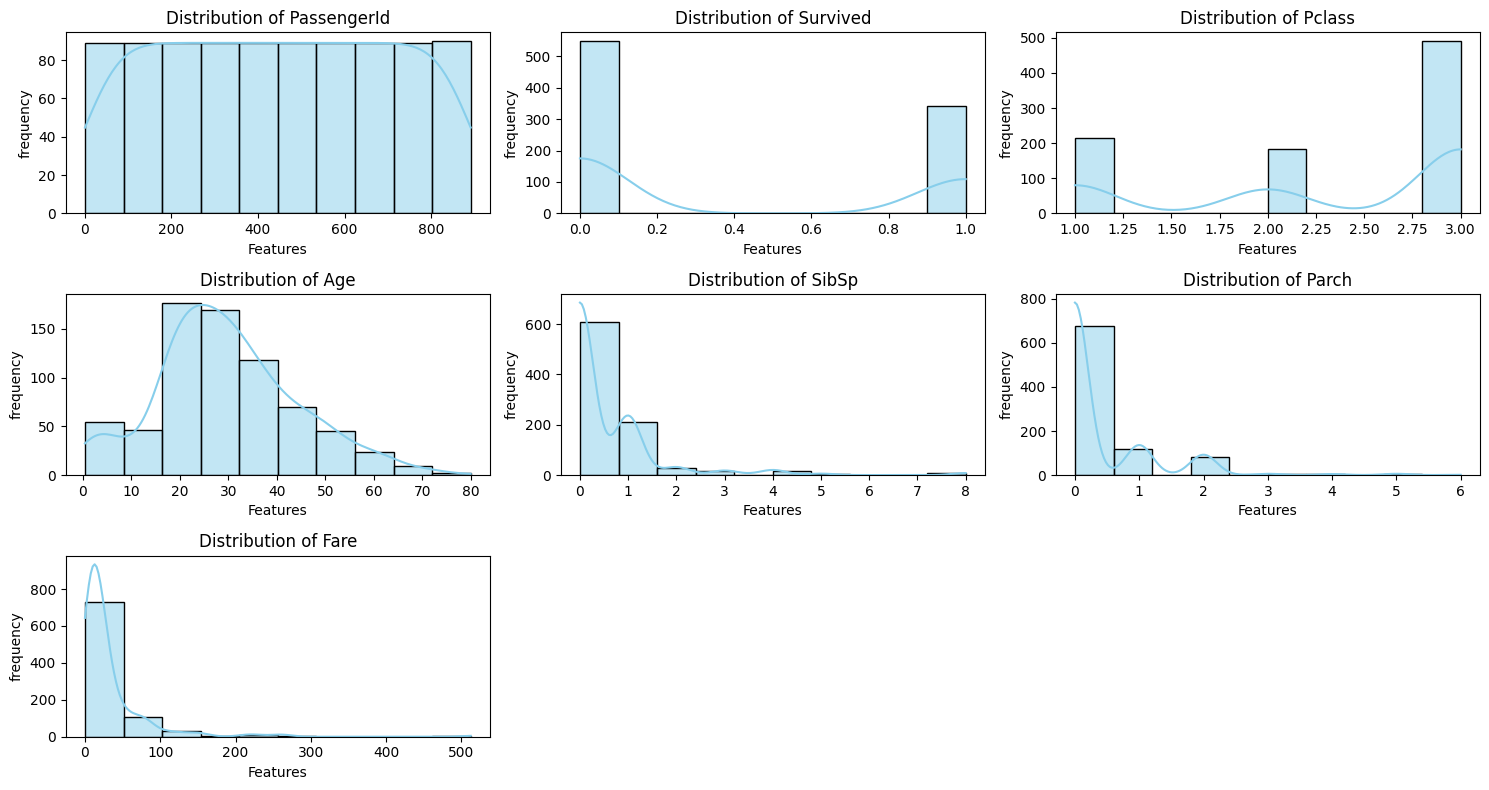

In [25]:


# Plot mean and standard deviation using a for loop
plt.figure(figsize=(15, 8))
num = df.select_dtypes(include='number').columns


for i, feature in enumerate(num, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature] , kde=True , bins=10 , color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Features')
    plt.ylabel('frequency')
    # plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# check skewness in our data

### What is Skewness in Data?

**Skewness** measures the asymmetry of data distribution. It shows whether the data is **symmetrical**, **left-skewed**, or **right-skewed**.

- **Symmetrical Data (Skewness ≈ 0)**: Data is evenly distributed around the mean.
- **Right-Skewed Data (Positive Skewness)**: Long tail on the right side; more data is concentrated on the left (e.g., income distribution).
- **Left-Skewed Data (Negative Skewness)**: Long tail on the left side; more data is concentrated on the right.

### Why Do We Use It?

1. **Understand Data Distribution**: To decide the right statistical techniques.
2. **Model Selection**: Some models assume normal distribution (low skewness).
3. **Feature Engineering**: Highly skewed data might need transformations like log or square root.

### Short Explanation:
Skewness helps us check if our data is balanced or biased. It impacts model performance and feature preprocessing. We use it to decide whether transformations are needed to improve predictions.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [16]:
features = ['PassengerID' , 'Survived' , 'Pclass' , 'Age' , 'SibSp' , 'Parch' , 'Fare']
df = features.copy

In [33]:
features = df.select_dtypes(include='number')  # Select numerical columns
skewed = features.skew()  # Calculate skewness



In [34]:
print("Skewness of numerical Features: \n" , skewed)

Skewness of numerical Features: 
 PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


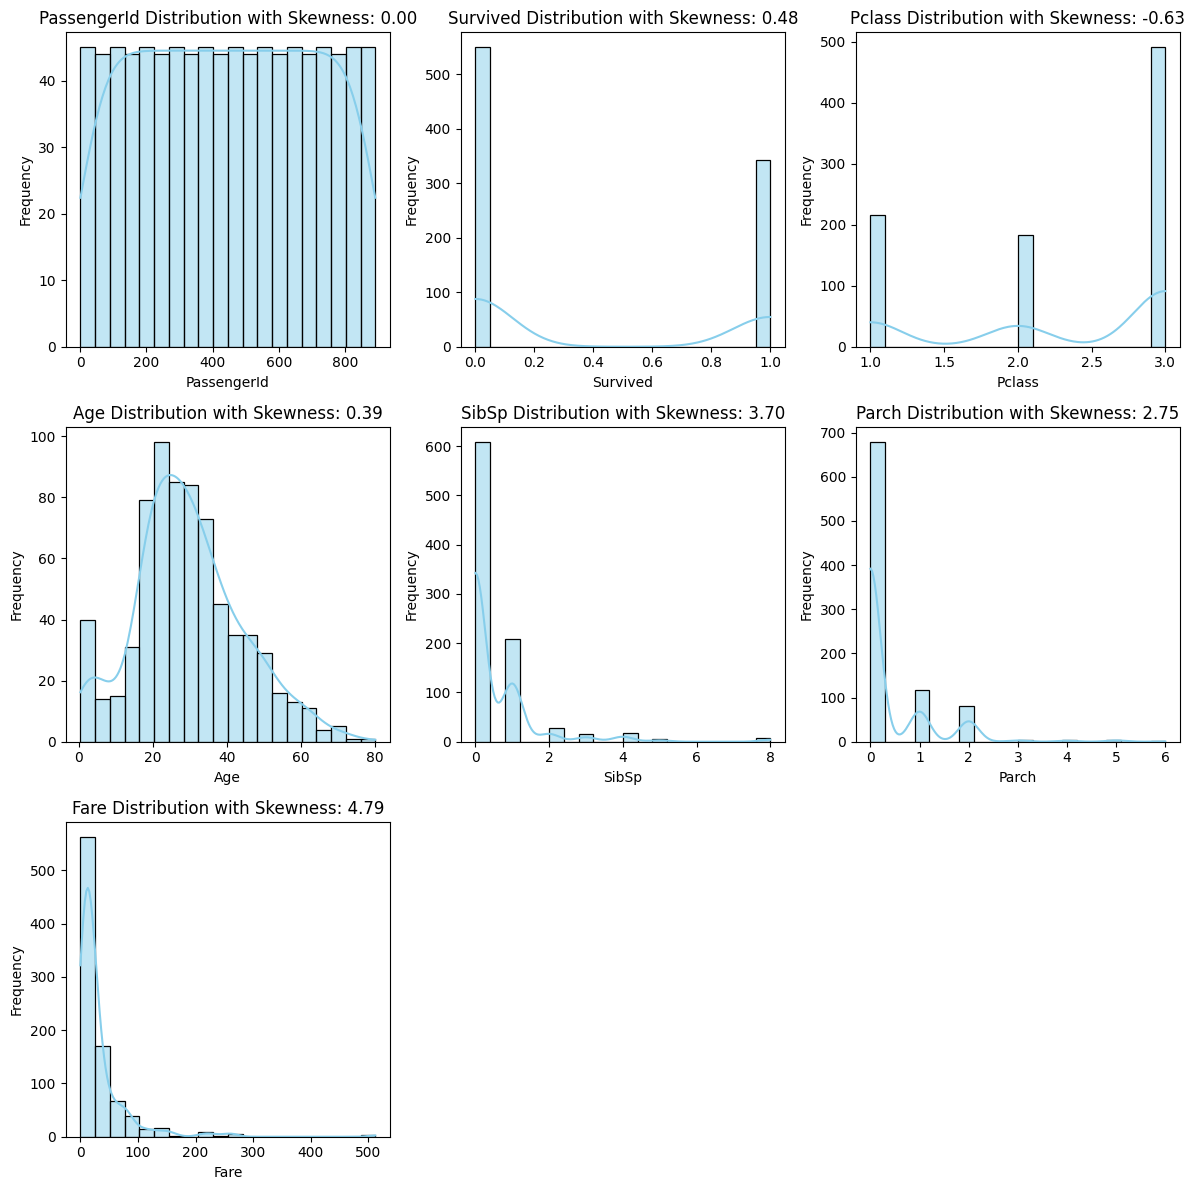

In [37]:
plt.figure(figsize=(12,12))
n_rows = 3
n_col = 3
for i, feature in enumerate(features , 1):
    plt.subplot(n_rows,n_col,i)
    sns.histplot(df[feature] , kde=True ,color='skyblue' , bins=20)
    plt.title(f'{feature} Distribution with Skewness: {skewed[feature]:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# check duplicates value

In [77]:
# Assuming your DataFrame is named df
duplicates = df.duplicated()

# Check the number of duplicated rows
print(f"Number of duplicated rows: {duplicates.sum()}")

Number of duplicated rows: 0


- In which we have no duplicates values

# check Null values

In [80]:
null_values = df.isnull().sum().sort_values()
print("Here is null values :\n " , null_values)

Here is null values :
  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64


# check imbalanced data

In [81]:
# Check the distribution of the target variable (Survived in this case)
class_distribution = df['Survived'].value_counts()

# Print the class distribution
print("Class distribution of target variable:")
print(class_distribution)


Class distribution of target variable:
Survived
0    549
1    342
Name: count, dtype: int64


In [39]:
a = 549
b = 342
print(a+b)

891


C:\Users\zeesh\AppData\Local\Temp\ipykernel_4956\1732839041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette="viridis")


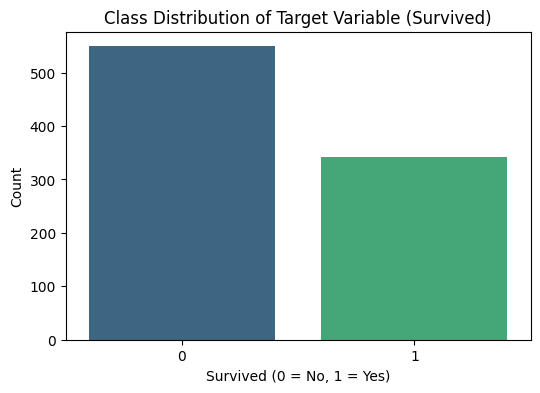

In [82]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette="viridis")
plt.title('Class Distribution of Target Variable (Survived)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()